## Data Handling in PyTorch

One of the most important parts of any machine learning pipeline is data handling, i.e. providing an iterface between data on the hard drive and the DL algorithm. 


We typically can't load all the data in the RAM at once as the data in DL application is prohibitively large. And we don't need all the data a single time, anyway, for algorithms like Batch/Sotchastic gradient decent.

PyTorch provides dataloader to effictively load the data and provide a pipeline from data to the DL algorithm. 

Below we will look at an example of a dataloader written in PyTorch.

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import imageio as Image
from torchvision import transforms
from torchvision.datasets import MNIST
import pandas as pd

%matplotlib inline

In [1]:
!wget -O data.zip https://www.dropbox.com/sh/eo3ngz5bno9vxkq/AACZzrvhQiXsBc1lKMw6H5ida?dl=0

--2022-08-25 08:05:18--  https://www.dropbox.com/sh/eo3ngz5bno9vxkq/AACZzrvhQiXsBc1lKMw6H5ida?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/eo3ngz5bno9vxkq/AACZzrvhQiXsBc1lKMw6H5ida [following]
--2022-08-25 08:05:18--  https://www.dropbox.com/sh/raw/eo3ngz5bno9vxkq/AACZzrvhQiXsBc1lKMw6H5ida
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9d2dafa207ff669e38e29c527b.dl-eu.dropboxusercontent.com/zip_download_get/BPBhqMDYuXrb3xKcI8vtAJ94qiT3FVnrJZx0r51iwkBcxkVGI0UMttPStmDVCeNj0g59OBcxjjR2lCpn4kWZuy7txCneOU6AafSJzEEhQj9Pfw# [following]
--2022-08-25 08:05:19--  https://uc9d2dafa207ff669e38e29c527b.dl-eu.dropboxusercontent.com/zip_download_get/BPBhqMDYuXrb3xKcI8vtAJ94qiT3FVnrJZx0r51iwkBcxkVGI0UMttPStmDVCeNj0g59OBcxjj

In [ ]:
!unzip data.zip
!unzip images.zip



In most practical applications data will be located on folders on the hard drive and you will have a txt/csv file with the classifcation labels.

To mimic this real life situation we will first write some samples of MNIST dataset to the hard disk and provide a file with the labels.

We will then load this data with a data loader.

In [4]:
!ls -la

total 1724
drwxr-xr-x 1 root root   4096 Aug 25 08:05 .
drwxr-xr-x 1 root root   4096 Aug 25 08:05 ..
drwxr-xr-x 4 root root   4096 Aug 15 13:44 .config
drwxr-xr-x 3 root root   4096 Aug 25 08:05 content
-rw-r--r-- 1 root root 869580 Aug 25 08:05 data.zip
-rwxr--r-- 1 root root 855409 Aug 19 21:43 images.zip
-rwxr--r-- 1 root root  13793 Aug 19 21:44 labels.csv
drwxr-xr-x 1 root root   4096 Aug 15 13:44 sample_data


In [ ]:
!ls content/images

In [9]:
df = pd.read_csv("labels.csv")

In [10]:
df

,Unnamed: 0,Name,Labels
0,0,0.jpg,9
1,1,1.jpg,0
2,2,2.jpg,3
3,3,3.jpg,8
4,4,4.jpg,7
...,...,...,...
995,995,995.jpg,4
996,996,996.jpg,4
997,997,997.jpg,0
998,998,998.jpg,8


In [11]:
from torch.utils.data import Dataset, DataLoader

In [101]:
from matplotlib.transforms import TransformedPatchPath
createTensor = transforms.ToTensor()
class MNISTDataset(Dataset):
  #images -> contents/images/
  #labels -> labels.csv
  def __init__(self, impath, labels_file, transform = False):
    super().__init__()
    self.impath =impath
    df = pd.read_csv(labels_file)
    self.names = df['Name']
    self.labels = df['Labels']
    self.transform = transform


  def __len__(self):
    return len(self.names)

  def __getitem__(self,idx):
    im = Image.imread(f"{self.impath}{self.names[idx]}")
    im = np.array(im)
  
    im = createTensor(im)
    label = self.labels[idx]
    
    print(im.shape)
    if self.transform:
      t = self.transform
      im = t(im)
    
    print(im.shape)
    #im = torch.permute(im, (2,0,1))
    data = {'image': im,'label': label,}
    return data


  

  


In [171]:
trans = transforms.Compose([transforms.RandomCrop(28, 4)])
dataset = MNISTDataset('content/images/', 'labels.csv' , transform = trans)

torch.Size([3, 28, 28])
torch.Size([1, 3, 28, 28])
torch.Size([3, 28, 28])
(3, 28, 28)


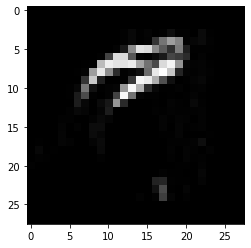

In [172]:
im = dataset[0]['image'].numpy()
print(im.shape)
im = np.transpose(im , (1,2,0))
plt.imshow(im)

In [166]:

dataloader = DataLoader(dataset, batch_size = 4, shuffle = False)
dl = iter(dataloader)
batch = next(dl)

torch.Size([3, 28, 28])
torch.Size([1, 3, 28, 28])
torch.Size([3, 28, 28])
torch.Size([3, 28, 28])
torch.Size([1, 3, 28, 28])
torch.Size([3, 28, 28])
torch.Size([3, 28, 28])
torch.Size([1, 3, 28, 28])
torch.Size([3, 28, 28])
torch.Size([3, 28, 28])
torch.Size([1, 3, 28, 28])
torch.Size([3, 28, 28])


In [71]:
type(batch['image'])

torch.Tensor